In [90]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = pd.read_csv("All_Y.csv")

In [83]:
spectra = data.iloc[:, :-1]
label = data.iloc[:, -1]
print(label)

0      Corn
1      Corn
2      Corn
3      Corn
4      Corn
       ... 
889     PAO
890     PAO
891     PAO
892     PAO
893     PAO
Name: Corn, Length: 894, dtype: object


In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(spectra, label, test_size = 0.3, random_state = 69, stratify = label)




In [85]:
randoForest = RandomForestClassifier(n_estimators = 100, random_state = 69)

randoForest.fit(X_train, Y_train)

RandomForestClassifier(random_state=69)

In [86]:
Y_pred = randoForest.predict(X_test)

print(classification_report(Y_test,Y_pred))
print("Accuracy", accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

        Corn       1.00      1.00      1.00        30
      E.coli       0.97      1.00      0.98        30
         FAE       1.00      1.00      1.00        60
        MSSA       1.00      1.00      1.00        29
        Malt       1.00      0.98      0.99        60
         PAO       1.00      1.00      1.00        60

    accuracy                           1.00       269
   macro avg       0.99      1.00      1.00       269
weighted avg       1.00      1.00      1.00       269

Accuracy 0.9962825278810409


In [87]:
print("Label Distribution in training set:")
print(Y_train.value_counts())

print("\nLabel distribution in testing set:")
print(Y_test.value_counts())

Label Distribution in training set:
Corn
FAE       140
PAO       140
Malt      140
E.coli     70
Corn       69
MSSA       66
Name: count, dtype: int64

Label distribution in testing set:
Corn
PAO       60
Malt      60
FAE       60
E.coli    30
Corn      30
MSSA      29
Name: count, dtype: int64


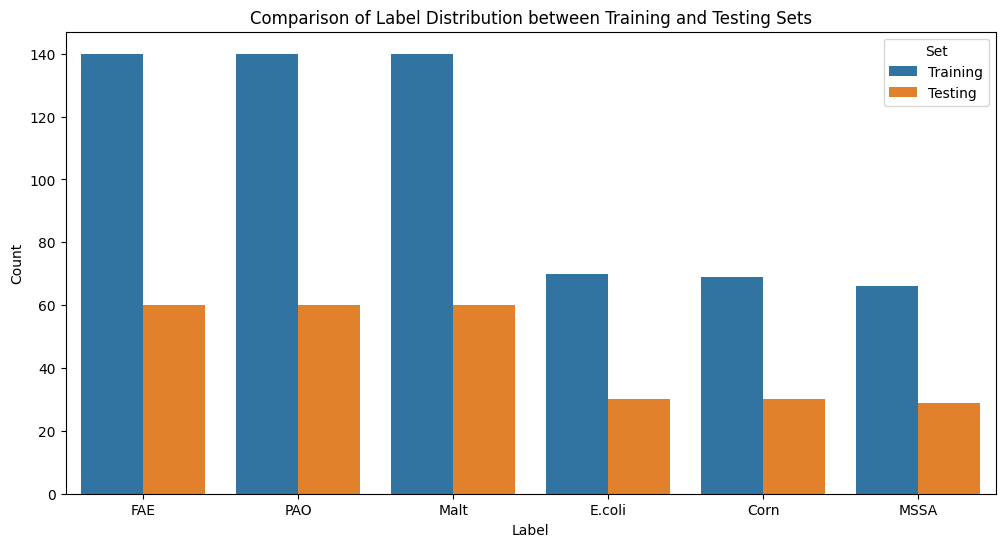

In [88]:
train_labels_df = pd.DataFrame(Y_train.value_counts()).reset_index()
train_labels_df.columns = ['Label', 'Count']
train_labels_df['Set'] = 'Training'

test_labels_df = pd.DataFrame(Y_test.value_counts()).reset_index()
test_labels_df.columns = ['Label', 'Count']
test_labels_df['Set'] = 'Testing'

combined_df = pd.concat([train_labels_df, test_labels_df])

plt.figure(figsize=(12, 6))
sns.barplot(x='Label', y='Count', hue='Set', data=combined_df)
plt.title('Comparison of Label Distribution between Training and Testing Sets')
plt.show()